In [2]:
import json
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import plt_utils

hyperparameters = {
    "retriever.n_docs": 2,  # for each side
    "evaluator.n_prompts": 5,
    "evaluator.max_new_tokens": 20,
}

latency_opt = {
    0: {
        "DRAGON": "outputs/Latency-20250323225639/stats.json",
        "DRDG/TW": "outputs/Latency-20250323225825/stats.json",
        "CRCG/Device": "outputs/Latency-20250323230007/stats.json",
        "CRCG/Cloud": "outputs/Latency-20250323230028/stats.json",
        "DRDG/SW": "outputs/Latency-20250323230630/stats.json",
    }, 
    50: {  # 50ms/~10ms
        "DRAGON": "outputs/Latency-20250323231041/stats.json",
        "DRDG/TW": "outputs/Latency-20250323231259/stats.json",
        "DRDG/SW": "outputs/Latency-20250323231435/stats.json"
    },
    100: { # 100ms/~20ms
        "DRAGON": "outputs/Latency-20250323232028/stats.json",
        "DRDG/TW": "outputs/Latency-20250323231846/stats.json",
        "DRDG/SW": "outputs/Latency-20250323231705/stats.json"
    },
    150: { # 150ms/~30ms
        "DRAGON": "outputs/Latency-20250323232346/stats.json",
        "DRDG/TW": "outputs/Latency-20250323232512/stats.json",
        "DRDG/SW": "outputs/Latency-20250323232703/stats.json"
    },
    200: { # 200ms/~40ms
        "DRAGON": "outputs/Latency-20250323233715/stats.json",
        "DRDG/TW": "outputs/Latency-20250323233932/stats.json",
        "DRDG/SW": "outputs/Latency-20250323234659/stats.json"
    },
    250: { # 250ms/~50ms
        "DRAGON": "outputs/Latency-20250323235437/stats.json",
        "DRDG/TW": "outputs/Latency-20250323235240/stats.json",
        "DRDG/SW": "outputs/Latency-20250323235039/stats.json"
    },
    300: { # 300ms/~60ms
        "DRAGON": "outputs/Latency-20250323233422/stats.json",
        "DRDG/TW": "outputs/Latency-20250323233226/stats.json",
        "DRDG/SW": "outputs/Latency-20250323233033/stats.json",
    }
}

latency_qwen = {
    0: {
        "DRAGON": "outputs/Latency-20250324002002/stats.json",
        "DRDG/TW": "outputs/Latency-20250324002215/stats.json",
        "CRCG/Device": "outputs/Latency-20250324001218/stats.json",
        "CRCG/Cloud": "outputs/Latency-20250324001222/stats.json",
        "DRDG/SW": "outputs/Latency-20250324002416/stats.json",
    }, 
    50: {  # 50ms/~10ms
        "DRAGON": "outputs/Latency-20250324003714/stats.json",
        "DRDG/TW": "outputs/Latency-20250324003239/stats.json",
        "DRDG/SW": "outputs/Latency-20250324002847/stats.json"
    },
    100: { # 100ms/~20ms
        "DRAGON": "outputs/Latency-20250324003957/stats.json",
        "DRDG/TW": "outputs/Latency-20250324004158/stats.json",
        "DRDG/SW": "outputs/Latency-20250324004412/stats.json"
    },
    150: { # 150ms/~30ms
        "DRAGON": "outputs/Latency-20250324005146/stats.json",
        "DRDG/TW": "outputs/Latency-20250324004936/stats.json",
        "DRDG/SW": "outputs/Latency-20250324004707/stats.json"
    },
    200: { # 200ms/~40ms
        "DRAGON": "outputs/Latency-20250324005446/stats.json",
        "DRDG/TW": "outputs/Latency-20250324005655/stats.json",
        "DRDG/SW": "outputs/Latency-20250324005924/stats.json"
    },
    250: { # 250ms/~50ms
        "DRAGON": "outputs/Latency-20250324010851/stats.json",
        "DRDG/TW": "outputs/Latency-20250324010604/stats.json",
        "DRDG/SW": "outputs/Latency-20250324010335/stats.json"
    },
    300: { # 300ms/~60ms
        "DRAGON": "outputs/Latency-20250324011120/stats.json",
        "DRDG/TW": "outputs/Latency-20250324013105/stats.json",
        "DRDG/SW": "outputs/Latency-20250324013338/stats.json"
    }
}

for group in latency_opt:
    latency_opt[group]["CRCG/Device"] = latency_opt[0]["CRCG/Device"]
    latency_opt[group]["CRCG/Cloud"] = latency_opt[0]["CRCG/Cloud"]

for group in latency_opt:
    for method in latency_opt[group]:
        with open(Path("..") / latency_opt[group][method]) as f:
            stats = json.load(f)
        latency_per_token = 1000 * np.mean([
            stat['LatencyPerToken'] for stat in stats])
        latency_opt[group][method] = latency_per_token

for group in latency_qwen:
    latency_qwen[group]["CRCG/Device"] = latency_qwen[0]["CRCG/Device"]
    latency_qwen[group]["CRCG/Cloud"] = latency_qwen[0]["CRCG/Cloud"]
for group in latency_qwen:
    for method in latency_qwen[group]:
        if latency_qwen[group][method] == "":
            latency_qwen[group][method] = 0
            continue
        with open(Path("..") / latency_qwen[group][method]) as f:
            stats = json.load(f)
        latency_per_token = 1000 * np.mean([
            stat['LatencyPerToken'] for stat in stats])
        latency_qwen[group][method] = latency_per_token

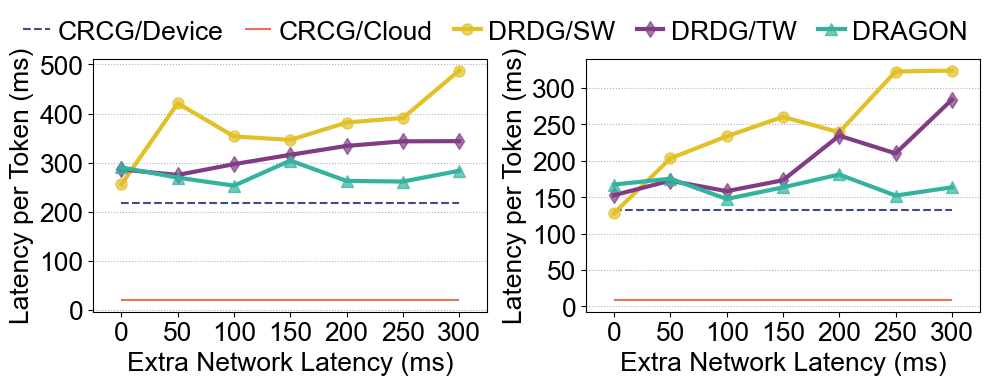

In [9]:
def hex2rgb(hex_color: str):
    hex_color = hex_color.lstrip('#')
    rgb_color = list(int(hex_color[i:i+2], 16) / 255.0 for i in (0, 2, 4))
    return rgb_color

methods = ["DRDG/SW", "DRDG/TW", "DRAGON"]
color_crcg_cloud = '#EC6F5C'
color_crcg_device = '#414C87'
colors = ['#e2c027', '#813c85', '#33B39F']
marker = ['o', 'd', '^', 's']

font = plt_utils.Font("arial", size=19)
n_docs_list = list(range(2, 17, 2))
marker_alpha = 0.7
plt.figure(figsize=(10, 3.5), dpi=100)
for i, latency in enumerate([latency_qwen, latency_opt]):
    plt.subplot(1, 2, i + 1)
    plt.hlines(latency[0]["CRCG/Device"], 0, len(latency) - 1, linestyle='--', color=color_crcg_device, label="CRCG/Device")
    plt.hlines(latency[0]["CRCG/Cloud"], 0, len(latency) - 1, linestyle='-', color=color_crcg_cloud, label="CRCG/Cloud")
    for j, method in enumerate(methods):
        stats = [latency[group][method] for group in latency]
        plt.plot(
            stats, label=method, zorder=2, markersize=8, linewidth=3,
            marker=marker[j % len(marker)], color=colors[j % len(colors)],
            markerfacecolor=hex2rgb(colors[j % len(colors)]) + [marker_alpha]
        )
    plt.xticks(np.arange(len(latency_opt)), [0, 50, 100, 150, 200, 250, 300], fontproperties=font)
    plt.xlim(-0.5, len(latency_opt) - 0.5)
    plt.yticks(fontproperties=font)
    plt.xlabel('Extra Network Latency (ms)', fontproperties=font)
    plt.ylabel('Latency per Token (ms)', fontproperties=font)
    plt.grid(axis='y', linestyle=':', zorder=1)
    plt.tight_layout()
plt.legend(
    prop=font, loc='upper right', bbox_to_anchor=(1.03, 1.25),
    ncol=5, labelspacing=0.2, columnspacing=0.8, 
    frameon=False, handlelength=1, handletextpad=0.3
)
plt.subplots_adjust(wspace=0.25)
plt.savefig('latency.pdf', bbox_inches='tight')
plt.show()